# Firmware Build Setup

Supported setups:

SCOPES:

* OPENADC
* CWNANO

PLATFORMS:

* CWLITEARM
* CWLITEXMEGA
* CWNANO

This tutorial will introduce you to the software side of ChipWhisperer, including the tutorials themselves. It will also show you how to perform different operations on data based on input from the ChipWhisperer software. This can be used for building your own system which you wish to 'break'. All the `%%bash` blocks can be run either in Jupyter or in your favourite command line environment (note that Jupyter resets your path between blocks).

If you haven't run through `!!Introduction_to_Jupyter!!.ipynb` do that now.

Assuming you've done that, we can get started on the tutorial.

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'

## What is SimpleSerial

SimpleSerial is the communications protocol used for almost all of the ChipWhisperer demo project. It's a very basic serial protocol which can be easily implemented on most systems. This system communicates using a standard asyncronous serial protocol, 38400 baud, 8-N-1.

All messages are sent in ASCII-text, and are normally terminated with a line-feed (`'\n'`). This allows you to interact with the simpleserial system over a standard terminal emulator.

`x`

> Sending a 'x' resets the buffers. This does not require a line-feed termination. It is suggested to always send a stream of x's to initilize the system in case the device was already in some other mode due to noise/corruption.

`k00112233445566778899AABBCCDDEEFF\n`

> Loads the encryption key `00112233445566778899AABBCCDDEEFF` into the system. If not called the system may use some default key.

`pAABBCCDDEEFF00112233445566778899\n`

> Encrypts the data `AABBCCDDEEFF00112233445566778899` with the key loaded with the 'k' command. The system will respond with a string starting with r, as shown next.

`rCBBD4A2B34F2571758FF6A797E09859D\n`

> This is the response from the system. If data has been encrypted with a 'p' for example, the system will respond with the 'r' sequence automatically. So sending the earlier example means the result of the encryption was `cbbd4a2b34f2571758ff6a797e09859d`.

## Building the Basic Example

To bulid the basic example, you'll need an appropriate compiler for your target. For the ChipWhisperer Lite/Xmega platform, you'll need `avr-gcc` and `avr-libc`, while if you're using an ARM target (like the ChipWhisperer Lite/STM32 platform), your need the GNU Toolchain for ARM devices. If you're using a target with a different architecture, you'll need to install the relevant compiler. If you're unsure, you can run the block below. If you've got the right stuff installed, you should see some version and copyright info printed for the relevant compiler:

In [32]:
%%bash
#check for avr-gcc
avr-gcc --version

#check for ARM gcc
arm-none-eabi-gcc --version

avr-gcc (GCC) 5.4.0
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

arm-none-eabi-gcc (15:9-2019-q4-0ubuntu1) 9.2.1 20191025 (release) [ARM/arm-9-branch revision 277599]
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Now that you have the relevant toolchain installed, you should be able to build firmware for your desired platform. We'll begin by creating a new project based on simpleserial-base by making a new firmware and copying the files from the project we want to work on:

In [2]:
#%%bash
#cd ../hardware/victims/firmware/
#mkdir -p will-crypto-lab1 && cp -r will-crypto/* $_
#cd will-crypto-lab1

Next we'll build the firmware. You'll need to specify the `PLATFORM` and `CRYPTO_TARGET` for your target. To save you from having to re-enter this info in every make block, you can edit the python below with your platform and crypto_target.

Common platforms are CWLITEXMEGA and CWLITEARM. To see a list of platforms leave `PLATFORM` as is.

This tutorial doesn't use any crypto, so we can leave `CRYPTO_TARGET` as `NONE`.

In [2]:
CRYPTO_TARGET = "NONE"

Provided you completed the fields above, you should be able to successfully run the block below.

In [3]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../hardware/victims/firmware/will-cryptoGIFT64Base3
make PLATFORM=$1 CRYPTO_TARGET=$2

rm -f -- simpleserial-base-CWLITEARM.hex
rm -f -- simpleserial-base-CWLITEARM.eep
rm -f -- simpleserial-base-CWLITEARM.cof
rm -f -- simpleserial-base-CWLITEARM.elf
rm -f -- simpleserial-base-CWLITEARM.map
rm -f -- simpleserial-base-CWLITEARM.sym
rm -f -- simpleserial-base-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-base.s crypto.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- simpleserial-base.d crypto.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- simpleserial-base.i crypto.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
.
-------- begin --------
arm-none-eabi-gcc (15:9-2019-q4-0ubuntu1) 9.2.1 20191025 (release) [ARM/arm-9-branch revision 277599]
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling C: simpl

## Modifying the Basic Example

At this point we want to modify the system to perform 'something' with the data, such that we can confirm the system is working. To do so, open the file `simpleserial-base.c` in the simpleserial-base-lab1 folder with a code editor such as Programmer's Notepad (which ships with WinAVR).

Find the following code block towards the end of the file:

```C
/**********************************
 * Start user-specific code here. */
trigger_high();

//16 hex bytes held in 'pt' were sent
//from the computer. Store your response
//back into 'pt', which will send 16 bytes
//back to computer. Can ignore of course if
//not needed

trigger_low();
/* End user-specific code here. *
```

Now modify it to increment the value of each data byte:

```C
/**********************************
 * Start user-specific code here. */
trigger_high();

//16 hex bytes held in 'pt' were sent
//from the computer. Store your response
//back into 'pt', which will send 16 bytes
//back to computer. Can ignore of course if
//not needed

for(int i = 0; i < 16; i++){
    pt[i]++;
}

trigger_low();
/* End user-specific code here. *
 ********************************/
```

Then rebuild the file with `make`:

In [75]:
#%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
##cd ../hardware/victims/firmware/will-crypto-lab1
#make PLATFORM=$1 CRYPTO_TARGET=$2

rm -f -- simpleserial-base-CWLITEARM.hex
rm -f -- simpleserial-base-CWLITEARM.eep
rm -f -- simpleserial-base-CWLITEARM.cof
rm -f -- simpleserial-base-CWLITEARM.elf
rm -f -- simpleserial-base-CWLITEARM.map
rm -f -- simpleserial-base-CWLITEARM.sym
rm -f -- simpleserial-base-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-base.s crypto.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- simpleserial-base.d crypto.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- simpleserial-base.i crypto.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
.
-------- begin --------
arm-none-eabi-gcc (15:9-2019-q4-0ubuntu1) 9.2.1 20191025 (release) [ARM/arm-9-branch revision 277599]
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling C: simpl

simpleserial-base.c: In function 'get_pt':
simpleserial-base.c:42:10: warning: unused variable 'TXT' [-Wunused-variable]
   42 |  uint8_t TXT[8];
      |          ^~~
simpleserial-base.c:41:10: warning: unused variable 'GIFT_KEY' [-Wunused-variable]
   41 |  uint8_t GIFT_KEY[16];
      |          ^~~~~~~~


## Python Script

We'll end by uploading the firmware onto the target and communicating with it via a python script. Depending on your target, uploading firmware will be different. For the XMega and STM32 targets, you can use ChipWhisperer's interface. Otherwise, you'll likely need to use and external programmer. If you have a CW1173/Xmega board, you can run the following blocks without modification. After running the final block, you should see two sets of hexadecimal numbers, with the second having values one higher than the first.

We'll begin by importing the ChipWhisperer module. This will allow us to connect to and communicate with the ChipWhisperer hardware. The ChipWhisperer module also includes analysis software, which we'll be looking at in later tutorials.

In [4]:
import chipwhisperer as cw

Documentation is available on [ReadtheDocs](https://chipwhisperer.readthedocs.io/en/latest/api.html) or by calling `help()` on the module, submodule, function, etc.:

In [128]:
help(cw)

Help on package chipwhisperer:

NAME
    chipwhisperer

DESCRIPTION
    .. module:: chipwhisperer
       :platform: Unix, Windows
       :synopsis: Test
    
    .. moduleauthor:: NewAE Technology Inc.
    
    Main module for ChipWhisperer.

PACKAGE CONTENTS
    analyzer (package)
    capture (package)
    common (package)
    hardware (package)

SUBMODULES
    key_text_patterns
    ktp
    programmers
    project
    scopes
    targets
    util

FUNCTIONS
    captureTrace(scope, target, plaintext, key=None)
        Deprecated: Use capture_trace instead.
    
    capture_trace(scope, target, plaintext, key=None)
        Capture a trace, sending plaintext and key
        
        Does all individual steps needed to capture a trace (arming the scope
        sending the key/plaintext, getting the trace data back, etc.)
        
        Args:
            scope (ScopeTemplate): Scope object to use for capture.
            target (TargetTemplate): Target object to read/write text from.
    

Next we'll need to connect to the scope end of the hardware. Starting with ChipWhisperer 5.1, `cw.scope` will attempt to autodetect which scope type you have (though if you have multiple ChipWhisperers connected, you'll need to specify the serial number). If you'd like, you can still specify the scope type.

In [5]:
i = 5
print(i)
scope = cw.scope()

5


In [105]:
help(scope)

Help on OpenADC in module chipwhisperer.capture.scopes.OpenADC object:

class OpenADC(chipwhisperer.capture.scopes.base.ScopeTemplate, chipwhisperer.common.utils.util.DisableNewAttr)
 |  OpenADC scope object.
 |  
 |  This class contains the public API for the OpenADC hardware, including the
 |  ChipWhisperer Lite/ CW1200 Pro boards. It includes specific settings for
 |  each of these devices.
 |  
 |  To connect to one of these devices, the easiest method is::
 |  
 |      import chipwhisperer as cw
 |      scope = cw.scope(type=scopes.OpenADC)
 |  
 |  Some sane default settings are available via::
 |  
 |      scope.default_setup()
 |  
 |  This code will automatically detect an attached ChipWhisperer device and
 |  connect to it.
 |  
 |  For more help about scope settings, try help() on each of the ChipWhisperer
 |  scope submodules (scope.gain, scope.adc, scope.clock, scope.io,
 |  scope.trigger, and scope.glitch):
 |  
 |   *  :attr:`scope.gain <.OpenADC.gain>`
 |   *  :attr:`sc

We'll also need to setup the interface to the target (typically what we want to attack). Like with scopes, there's a few different interfaces we can use, which are available through `scope.targets.<target_type>`. The default, SimpleSerial, communicates over UART and is almost always the correct choice.

In [6]:
target = cw.target(scope, cw.targets.SimpleSerial)

Serial baud rate = 38400


Next, we'll do some basic setup. Most of these settings don't matter for now, but take note of the `scope.clock` and `scope.io`, which setup the clock and serial io lines, which needs to be done before programming the target. 

**Some targets require settings different than what's below. Check the relevant wiki article for your target for more information**

In [150]:
# setup scope parameters
if SCOPETYPE == "OPENADC":
    scope.gain.db = 45
    scope.adc.samples = 3000
    scope.adc.offset = 1250
    scope.adc.basic_mode = "rising_edge"
    scope.clock.clkgen_freq = 7370000
    scope.clock.adc_src = "clkgen_x4"
    scope.trigger.triggers = "tio4"
    scope.io.tio1 = "serial_rx"
    scope.io.tio2 = "serial_tx"
    scope.io.hs2 = "clkgen"
elif SCOPETYPE == "CWNANO":
    scope.io.clkout = 7370000
    scope.adc.clk_freq = 7370000
    scope.io.tio1 = "serial_rx"
    scope.io.tio2 = "serial_tx"

Or, more simply:

In [7]:
scope.default_setup()

Now that the clock and IO lines are setup, we can program the target. ChipWhisperer includes a generic programming function, `cw.program_target(scope, type, fw_path)`. Here `type` is one of the programmers available in the cw.programmers submodule (`help(cw.programmers)` for more information). `fw_path` is the path to the hex file that you want to flash onto the device.

The final part of the binary path should match your platform (`<path>/simpleserial-base-CWLITEARM.hex` for CWLITEARM)

In [8]:
if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
    prog = cw.programmers.STM32FProgrammer
elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
    prog = cw.programmers.XMEGAProgrammer
else:
    prog = None
    
fw_path = '../hardware/victims/firmware/will-cryptoGIFT64Base3/simpleserial-base-{}.hex'.format(PLATFORM)

In [51]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../hardware/victims/firmware/will-cryptoGIFT64Base3
make PLATFORM=$1 CRYPTO_TARGET=$2

rm -f -- simpleserial-base-CWLITEARM.hex
rm -f -- simpleserial-base-CWLITEARM.eep
rm -f -- simpleserial-base-CWLITEARM.cof
rm -f -- simpleserial-base-CWLITEARM.elf
rm -f -- simpleserial-base-CWLITEARM.map
rm -f -- simpleserial-base-CWLITEARM.sym
rm -f -- simpleserial-base-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-base.s crypto.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- simpleserial-base.d crypto.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- simpleserial-base.i crypto.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
.
-------- begin --------
arm-none-eabi-gcc (15:9-2019-q4-0ubuntu1) 9.2.1 20191025 (release) [ARM/arm-9-branch revision 277599]
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling C: simpl

crypto.c: In function 'encrypt':
crypto.c:115:14: warning: unused variable 'text' [-Wunused-variable]
  115 |     uint64_t text = in;
      |              ^~~~


And finally actually programming the device:

In [52]:


target = cw.target(scope, cw.targets.SimpleSerial)
print(fw_path)
cw.program_target(scope, prog, fw_path)

Serial baud rate = 38400
../hardware/victims/firmware/will-cryptoGIFT64Base3/simpleserial-base-CWLITEARM.hex
Serial baud rate = 115200
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5771 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5771 bytes
Serial baud rate = 38400


Finally, we'll load some text, send it to the target, and read it back. We also capture a trace here, but don't do anything with it yet (that will come in later tutorials). You should see your original text with the received text below it.

In [53]:




#GIFTSboxBase3 = ( 0, 5, 0xa, 0xf, 6, 8, 1, 0xf, 9, 2, 4, 0xf, 0xf, 0xf, 0xf, 0xf ) #Just one sample of base 3 s-box

GIFTSboxBase3 = (0, 5, 0x2, 0xf, 1, 0xc, 0x2, 4, 0x2, 0x2, 0x2, 0x2, 3, 7, 0x2, 0xd)

GIFTPbox64Base3 = ( 0, 8,16, 24,1,9,17,25,
                            2,10,18,26,3,11,19,27,
                            4,12,20,28,5,13,21,29,
                            6,14,22,30,7,15,23,31 )

def BitToByte(input):
    return (int)((input)/8)

def TritToByte(input):
    return (int) ((input)/4)

def NibbleToByte(input):
    return (int)((input)/2)


def ByteInputSBoxGIFTBase3(input):
    temp = GIFTSboxBase3[(input & 0xf)]
    temp2 = GIFTSboxBase3[((input >> 4) & 0xf)]
    return (temp2 << 4) | temp



def ApplySBox64Base3(input):
    tempArr = [0] * 8
    for i in range(8):
        tempArr[i] = 0x0
        tempArr[i] = ByteInputSBoxGIFTBase3(input[i])
    return tempArr


def ApplyPLayerBase3(input):
    temp = [0] * 8
    for i in range(32):
        tempTrit = (((input[TritToByte(i)]) >> ((i%4)*2)) & 0b11)
        pVal = GIFTPbox64Base3[i]
        temp[TritToByte(pVal)] |= (tempTrit << ((pVal % 4)*2))
    return temp
                    
def NibbleAddRoundKeyBase3(input1, input2):
    highIn1 = (input1 >> 2) & 0b11
    lowIn1 = input1 & 0b11
    highIn2 = (input2 >> 2) & 0b11
    lowIn2 = input2 & 0b11 
    
    highIn1 = fixFormat(highIn1)
    highIn2 = fixFormat(highIn2)
    lowIn1 = fixFormat(lowIn1)
    lowIn2 = fixFormat(lowIn2)
    
    sumHigh = (highIn1 + highIn2) % 3
    sumLow = (lowIn1 + lowIn2) % 3
    return (( fixFormat2(sumHigh)  << 2) | fixFormat2(sumLow))

def fixFormat(inputTrit):
    if(inputTrit == 3):
        return 2
    return inputTrit

def fixFormat2(inputTrit):
    if(inputTrit == 2):
        return 3
    return inputTrit

def ByteAddRoundKeyBase3(input1, input2):
    highIn1 = (input1 >> 4) & 0xf
    highIn2 = (input2 >> 4) & 0xf
    lowIn1 = input1 & 0xf
    lowIn2 = input2 & 0xf
    outHigh = NibbleAddRoundKeyBase3(highIn1, highIn2)
    outLow = NibbleAddRoundKeyBase3(lowIn1, lowIn2)
    return (outHigh << 4) | outLow
   
                    
def FullAddRoundKeyBase3(input, roundKey):
    returnArr = [0] * 8
    for i in range(8):
        returnArr[i] = ByteAddRoundKeyBase3(input[i], roundKey[i])
    return returnArr
                    

                    
def GIFT64toIntermediate1Base3(pt):
    temp = [0] * 8
    for i in range(8):
        temp[i] = pt[i]
    temp = ApplySBox64Base3(temp)
    temp = ApplyPLayerBase3(temp)
    return temp

def Sanatize(arr):
    returnArr = [0] * len(arr)
    for i in range(len(arr)):
        tempArr = [0] * 4
        for j in range(4): 
            tempArr[j] = ((arr[i] >> (j*2)) & 0b11)
            if(tempArr[j] == 0b10):
                tempArr[j] = 0
        for j in range(4):
            returnArr[i] |= (tempArr[j] << (2*j))
    return returnArr

def applyGuess(index, buffer, subKeyGuess):
    #print(NibbleToByte(index))
    temp = (buffer[NibbleToByte(index)] >> ((index % 2)*4)) & 0x0f
    temp = NibbleAddRoundKeyBase3(temp, subKeyGuess)
    temp = GIFTSboxBase3[temp]
    #print(temp)
    #temp = buffer[0] & 0xf
    #temp = temp ^ subKeyGuess
    #temp = GIFTSbox[temp]
    return temp

def GuessToRoundKeyFormat(arr):
    retArr = [0]*8
    #print ("length return val " , len(retArr))
    #print ("length arr " , len(arr))
    for i in range(8): 
        #print (i)
        retArr[i] = arr[2*i] | (arr[(2*i+1)] << 4)
    return retArr






In [54]:
ktp = cw.ktp.Basic() # object to generate fixed/random key and text (default fixed key, random text)
#text = ktp.next()
#key = ktp.next()
key, text = ktp.next()  # get our fixed key and random text
#help(ktp)
from binascii import hexlify

SKey = Sanatize(key)
SText = Sanatize(text)
print ("here")
print(SKey)
print(SText)
for i in range(len(key)):
    key[i] = SKey[i]
    text[i] = SText[i]
    #key[i] = 0x11
print("key formatted ", hexlify(key))
        
target.simpleserial_write('k', key)
target.simpleserial_wait_ack()
scope.arm()



#print("input text")
#print(hexlify(text))

target.simpleserial_write('p', text)
    
print("input ", hexlify(text))
print("sanatized Input" , Sanatize(text))
newArr = Sanatize(text)
SKey = Sanatize(key)
for i in range(len(text)):
    text[i] = newArr[i]
    key = SKey[i]
print("input after sanatization in formatted byte arr", hexlify(text))
for b in Sanatize(text): print("%02x " % b, end="")
ret = scope.capture()
trace = scope.get_last_trace()
output = target.simpleserial_read('r', 16)

print("output ", hexlify(output))

target.simpleserial_write('p', text)
    
print("input ", hexlify(text))
ret = scope.capture()
trace = scope.get_last_trace()
output = target.simpleserial_read('r', 16)


print("output ", hexlify(output))
print("output 1 hex below")
cipherOut = Sanatize(output)
for b in cipherOut: print("%02x " % b, end="")
    
print("\n round 1 after S-Box\n")
SboxRound1 = ApplySBox64Base3(text)
for b in SboxRound1: print("%02x " % b, end="")
    
print("\nRound 1 befroe add round key")
round1 = GIFT64toIntermediate1Base3(text)
for b in round1: print("%02x " % b, end="")
RK1 = (0x11, 0x01,0x10,0x01,0x03,0x00, 0x30,0x13)

round1 = FullAddRoundKeyBase3(round1, RK1)
print("\nround 1 after add roudn key")
for b in round1: print("%02x " % b, end="")

                                    

#print(hexlify(text))


#from bokeh.plotting import figure, show
#from bokeh.io import output_notebook


#output_notebook()
##p = figure()
#print("made it here")
#help(trace)
#print(trace.wave)
#xrange = range(len(trace.wave))
#print("made it here 2")
#p.line(xrange, trace.wave, line_color="red")
#show(p)
#print(trace)

here
[3, 124, 21, 20, 0, 12, 208, 4, 3, 247, 21, 0, 1, 207, 79, 60]
[68, 197, 7, 0, 76, 16, 16, 16, 211, 93, 211, 51, 21, 196, 65, 77]
key formatted  b'037c1514000cd00403f7150001cf4f3c'
input  b'44c507004c101010d35dd33315c4414d'
sanatized Input [68, 197, 7, 0, 76, 16, 16, 16, 211, 93, 211, 51, 21, 196, 65, 77]
input after sanatization in formatted byte arr b'44c507004c101010d35dd33315c4414d'
44 c5 07 00 4c 10 10 10 d3 5d d3 33 15 c4 41 4d output  b'11011001030030130000000000000000'
input  b'44c507004c101010d35dd33315c4414d'
output  b'11011001030030130000000000000000'
output 1 hex below
11 01 10 01 03 00 30 13 00 00 00 00 00 00 00 00 
 round 1 after S-Box

11 3c 04 00 13 50 50 50 
Round 1 befroe add round key
01 03 1c 00 0d 55 00 54 
round 1 after add roudn key
13 00 3c 01 0c 55 30 77 

In [49]:
#Trace Colleciton
#Capture Traces
from tqdm import tnrange
import numpy as np
import time

num_traces = 7500

ktp = cw.ktp.Basic()

scope.adc.samples = 23000
scope.adc.offset =  20000

traces = []

for i in tnrange(num_traces, desc='Capturing traces'):
    key, text = ktp.next()  # manual creation of a key, text pair can be substituted here
    SKey = Sanatize(key)
    SText = Sanatize(text)
    #print ("here")
    #print(SKey)
    #print(SText)
    for j in range(len(key)):
        key[j] = SKey[j]
        text[j] = SText[j]
    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    traces.append(trace)

#Convert traces to numpy arrays
trace_array = np.asarray([trace.wave for trace in traces])  # if you prefer to work with numpy array for number crunching
textin_array = np.asarray([trace.textin for trace in traces])
known_keys = np.asarray([trace.key for trace in traces])  # for fixed key, these keys are all the same
textout_array = np.asarray([trace.textout for trace in traces])

#print (textout_array[1])
#for b in textout_array[18]: print("%02x " % b, end="")

In [45]:
# Show graph of a single trace
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()
p = figure()

xrange = range(len(traces[0].wave))
p.line(xrange, traces[2].wave, line_color="red")
show(p)

Loading BokehJS ...

In [50]:
import numpy as np
from tqdm import tqdm

HW = [bin(n).count("1") for n in range(0, 16)]

numtraces = np.shape(trace_array)[0] #total number of traces
numpoint = np.shape(trace_array)[1] #samples per trace
#numpoint = 50000
print("num traces " , numtraces)

def Invert(input):
    temp = []
    for i in range(8):
        temp.append(input[7-i])
    return temp

pt = textin_array
knownkey = traces[0].key
#print (knownkey)
cparefs = [0] * 16
bestguess = [0]*16
tritSet = (0x00, 0x01, 0x03)

for bnum in tqdm(range(0, 16), desc='Attacking subkeys from Round Key 1'):
    cpaoutput = [0] * 16
    maxcpa = [0] * 16
    for kguess in tritSet:

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)

        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            #hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]
            #print(textin_array[tnum])
            #print("PT: " , textin_array[tnum])
            #invText = Invert(textin_array[tnum])
            #tempNum = GIFT64toIntermediate1Base3(invText)
            tempNum = GIFT64toIntermediate1Base3(textin_array[tnum])
            #print("Intermetary state: ", tempNum)
            appliedGuess = applyGuess(bnum, tempNum, kguess)
            #print(appliedGuess)
            hyp[tnum] = HW[appliedGuess]
            #print(HW[appliedGuess])
            #print(hyp[tnum])

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)
        #print("meanh " , meanh)
        
        #print(meanh)

        # Mean of all points in trace
        meant = np.mean(trace_array, axis=0, dtype=np.float64)
        #print("here")
        #print(len(meant))

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array[tnum, :] - meant
            #print("tdiff")
            #print("len tdiff " , len(tdiff))
            #print(tdiff)

            sumnum = sumnum + (hdiff * tdiff)
            #print(sumnum) All zeros
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff
            #print("len sumnum ", len(sumnum))

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))
        print("Subkey guess " , kguess, " had correlation value " , maxcpa[kguess])

    bestguess[bnum] = np.argmax(maxcpa)
    cparefs[bnum] = np.argsort(maxcpa)[::-1]

RK1 = GuessToRoundKeyFormat(bestguess)
#rint(RK1)
print("Prediction for Round Key 1")
for b in RK1: print("%02x " % b, end="")
#print("Best Key Guess: ", end="")
#for b in bestguess: print("%01x " % b, end="")

num traces  7456


Attacking subkeys from Round Key 1:   0%|          | 0/16 [00:00<?, ?it/s]

Subkey guess  0  had correlation value  0.09803444316612774
Subkey guess  1  had correlation value  0.13356185699544695
Subkey guess  3  had correlation value  0.05956645194918771


Attacking subkeys from Round Key 1:   6%|▋         | 1/16 [00:05<01:15,  5.02s/it]

Subkey guess  0  had correlation value  0.07937842672676598
Subkey guess  1  had correlation value  0.15685917295291466
Subkey guess  3  had correlation value  0.06348132271640279


Attacking subkeys from Round Key 1:  12%|█▎        | 2/16 [00:10<01:10,  5.04s/it]

Subkey guess  0  had correlation value  0.07358440805356
Subkey guess  1  had correlation value  0.13279296524707998
Subkey guess  3  had correlation value  0.07581470381704368


Attacking subkeys from Round Key 1:  19%|█▉        | 3/16 [00:15<01:05,  5.04s/it]

Subkey guess  0  had correlation value  0.18688449116501352
Subkey guess  1  had correlation value  0.08283024044824995
Subkey guess  3  had correlation value  0.05677311818335004


Attacking subkeys from Round Key 1:  25%|██▌       | 4/16 [00:20<01:02,  5.18s/it]

Subkey guess  0  had correlation value  0.17740430316539146
Subkey guess  1  had correlation value  0.04453766541742678
Subkey guess  3  had correlation value  0.0694568508250104


Attacking subkeys from Round Key 1:  31%|███▏      | 5/16 [00:25<00:56,  5.16s/it]

Subkey guess  0  had correlation value  0.07667738643791872
Subkey guess  1  had correlation value  0.07322956944451584
Subkey guess  3  had correlation value  0.049551859457131066


Attacking subkeys from Round Key 1:  38%|███▊      | 6/16 [00:30<00:51,  5.12s/it]

Subkey guess  0  had correlation value  0.0871992211127663
Subkey guess  1  had correlation value  0.12587068952176633
Subkey guess  3  had correlation value  0.10420392717568804


Attacking subkeys from Round Key 1:  44%|████▍     | 7/16 [00:35<00:45,  5.09s/it]

Subkey guess  0  had correlation value  0.19846290097183505
Subkey guess  1  had correlation value  0.11096371604142075
Subkey guess  3  had correlation value  0.07237338509817674


Attacking subkeys from Round Key 1:  50%|█████     | 8/16 [00:41<00:41,  5.13s/it]

Subkey guess  0  had correlation value  0.04739842012424489
Subkey guess  1  had correlation value  0.052072734332978994
Subkey guess  3  had correlation value  0.10288458834422233


Attacking subkeys from Round Key 1:  56%|█████▋    | 9/16 [00:46<00:35,  5.12s/it]

Subkey guess  0  had correlation value  0.17661315791386903
Subkey guess  1  had correlation value  0.05745362974052495
Subkey guess  3  had correlation value  0.046587680815138165


Attacking subkeys from Round Key 1:  62%|██████▎   | 10/16 [00:51<00:30,  5.10s/it]

Subkey guess  0  had correlation value  0.1619953775243833
Subkey guess  1  had correlation value  0.06985411012553303
Subkey guess  3  had correlation value  0.05958422812267667


Attacking subkeys from Round Key 1:  69%|██████▉   | 11/16 [00:56<00:25,  5.16s/it]

Subkey guess  0  had correlation value  0.17081801638055152
Subkey guess  1  had correlation value  0.07508228381120519
Subkey guess  3  had correlation value  0.043574191692939516


Attacking subkeys from Round Key 1:  75%|███████▌  | 12/16 [01:01<00:20,  5.12s/it]

Subkey guess  0  had correlation value  0.13349699266374537
Subkey guess  1  had correlation value  0.09784336411410174
Subkey guess  3  had correlation value  0.05864333774759831


Attacking subkeys from Round Key 1:  81%|████████▏ | 13/16 [01:06<00:15,  5.08s/it]

Subkey guess  0  had correlation value  0.039497720557477266
Subkey guess  1  had correlation value  0.05217844211017058
Subkey guess  3  had correlation value  0.1141004891134941


Attacking subkeys from Round Key 1:  88%|████████▊ | 14/16 [01:11<00:10,  5.07s/it]

Subkey guess  0  had correlation value  0.06708600463389366
Subkey guess  1  had correlation value  0.03768467225179231
Subkey guess  3  had correlation value  0.12260736318058703


Attacking subkeys from Round Key 1:  94%|█████████▍| 15/16 [01:16<00:05,  5.05s/it]

Subkey guess  0  had correlation value  0.12911029275972016
Subkey guess  1  had correlation value  0.09022103155930733
Subkey guess  3  had correlation value  0.10758236367919717


Attacking subkeys from Round Key 1: 100%|██████████| 16/16 [01:21<00:00,  5.05s/it]


Prediction for Round Key 1
11 01 00 01 03 00 30 03 

You can also just run:

In [103]:
project = cw.create_project("projects/jupyter_tvla_sw-GIFT64Base3-2kv3.cwp", overwrite=True)

#Capture Traces
import chipwhisperer as cw
from tqdm import tnrange
import numpy as np
import time
from binascii import hexlify

N = 500 # Number of traces
scope.adc.samples = 5000
scope.adc.offset =  0
ktp = cw.ktp.TVLATTest()
ktp.init(N)

keys = []
for i in tnrange(N, desc='Capturing traces'):
    #print ("here2 i = ", i)
    key, text = ktp.next()  # TVLA T-Test changes PT between two options
    SKey = Sanatize(key)
    SText = Sanatize(text)
    #for i in range(len(key)):
        #key[i] = SKey[i]
        #text[i] = SText[i]
    keys.append(key)
    trace = cw.capture_trace(scope, target, text, key)
    #target.simpleserial_write('k', key)
    #target.simpleserial_wait_ack()
    #scope.arm()
    #target.simpleserial_write('p', text)
    #ret = scope.capture()
    #trace = scope.get_last_trace()
    #output = target.simpleserial_read('r', 16)
    #print("before check")
    if i == 0:
        print("here")
        print("plaintext ", text)
        print("key ", key)
    #output = trace.simpleserial_read('r', 16)
    #print(hexlify(output))
    if trace is None:
        continue
    project.traces.append(trace)
    
#print(keys)
#print(traces[0])
    
project.save()

here
plaintext  CWbytearray(b'da 39 a3 ee 5e 6b 4b 0d 32 55 bf ef 95 60 18 90')
key  bytearray(b'\x01#Eg\x89\xab\xcd\xef\x124Vx\x9a\xbc\xde\xf0')


Capturing Traces
Below you can see the capture loop. The main body of the loop loads some new plaintext, arms the scope, sends the key and plaintext, then finally records and our new trace into our trace class. We'll also keep track of our keys manually for checking our answer later.

#Capture Traces
import chipwhisperer as cw
from tqdm import tnrange
import numpy as np
import time
​
N = 50  # Number of traces
​
ktp = cw.ktp.TVLATTest()
ktp.init(N)
​
keys = []
for i in tnrange(N, desc='Capturing traces'):
    key, text = ktp.next()  # TVLA T-Test changes PT between two options
    keys.append(key)
    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    project.traces.append(trace)
Capturing traces
100% 50/50 [00:01<00:00, 38.90it/s]

N

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
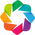

500 5000


:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Path.I    :Path   [x,y]
   .Path.II   :Path   [x,y]
   .Path.III  :Path   [x,y]
   .Path.IV   :Path   [x,y]

In [104]:
import holoviews as hv
hv.extension('bokeh')
import numpy as np
import scipy
import scipy.stats

project = cw.open_project("projects/jupyter_tvla_sw-GIFT64Base3-2kv3.cwp")
fixedpy = [0xda, 0x39, 0xa3, 0xee, 0x5e, 0x6b, 0x4b, 0x0d, 0x32, 0x55, 0xbf, 0xef, 0x95, 0x60, 0x18, 0x90]

testouts = []
num_traces = len(project.traces)
num_points = len(project.waves[0])
print(num_traces, num_points)
curve = hv.Curve([])

def do_the_ttvla(project, ntraces=-1):
    global curve, line
    if ntraces == -1:
        ntraces = int(num_traces / 2)
        
    if ntraces * 2 > num_traces:
        raise ValueError("Invalid ntraces")
    for g in range(0, 2):
        group = [(list(project.textins[i]) == fixedpy) for i in range(g*ntraces, g*ntraces+ntraces)]
        trace = np.zeros((ntraces, num_points))

        for n in range(g*ntraces, g*ntraces+ntraces):
            trace[n - g*ntraces][:] = project.waves[n]
                
        testout = welch_ttest(group, trace)
        curve *= hv.Curve(testout)
        testouts.extend(testout)
        
    curve *= hv.Path([(0, -4.5), (num_points, -4.5)]).opts(color="black") * \
    hv.Path([(0, 4.5), (num_points, 4.5)]).opts(color="black")
    curve *= hv.Path([(0, -100), (num_points, -100)]).opts(color="black") * \
    hv.Path([(0, 100), (num_points, 100)]).opts(color="black")

def welch_ttest(group, traces):
    import warnings
    # Compute Welch's t-statistic at each point in time
    # Here, group[] must only contain booleans (True/False)
    traces_true = traces[np.where(np.array(group))]
    traces_false = traces[np.where(~np.array(group))]
    
    if len(traces_true) == 0:
        traces_true  = np.array([[np.nan for _ in range(len(traces[0]))]])
    if len(traces_false) == 0:
        traces_false = np.array([[np.nan for _ in range(len(traces[0]))]])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ttrace = scipy.stats.ttest_ind(traces_true, traces_false, axis=0, equal_var=False)[0]
        
    return np.nan_to_num(ttrace) 
    
do_the_ttvla(project)
(curve).opts(height=600, width=600)

## Future Tutorials

The next tutorials that you run will start using helper scripts to make setup a little faster and more consistent between tutorials. Those scripts run mostly the same setup code that we did here, but if you'd like to see exactly what they're doing, they're all included in the `Helper_Scripts` folder.

For example, the scope setup (gain, clock, etc) is taken care of by `Helper Scripts/Setup_Generic.ipynb`.